<a href="https://colab.research.google.com/github/tskmr/BS/blob/main/Chap2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 準備

日本語が文字化け対策．
https://qiita.com/kota9/items/ef50061ef3d8b4b657ee によると，
```system("apt-get install -y fonts-noto-cjk")``` でフォントをインストールして，```theme_update(text=element_text(family="Noto Sans CJK JP"))```とせよ，とのこと．

In [ ]:
system("apt-get install -y fonts-noto-cjk")
systemfonts::system_fonts()

```ggplot2```のテーマをアップデートして，デフォルトで日本語フォントが使えるようにする．

In [26]:
theme_update(text=element_text(family="Noto Sans Mono CJK JP"))

ここで，ランタイムを再起動する．メニューから「ランタイム」->「ランタイムを再起動」を選択

テスト

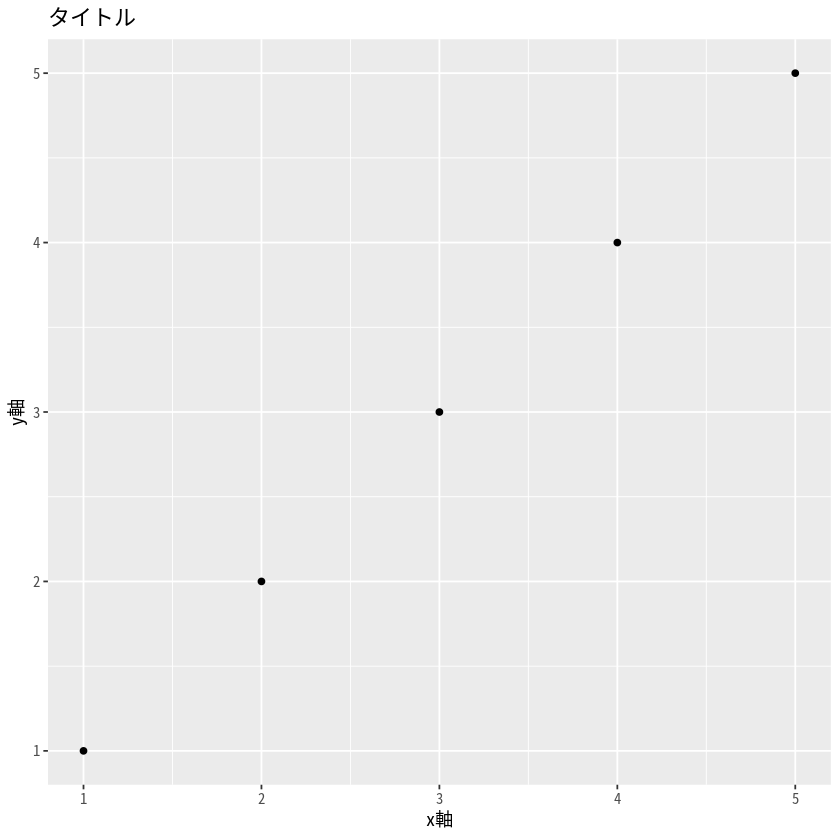

In [35]:
data.frame(x=1:5, y=1:5) %>% ggplot() + geom_point(aes(x, y)) +
  xlab("x軸") + ylab("y軸") + ggtitle("タイトル")

# 2. 確率モデルと最尤法

In [3]:
library(tidyverse)

## 2.1 確率モデル

In [4]:
rec.data <- data.frame(id = 1:10, action = c(0, 1, 0, 0, 0, 0, 1, 0, 0, 0))
rec.data

id,action
<int>,<dbl>
1,0
2,1
3,0
4,0
5,0
6,0
7,1
8,0
9,0


## 2.2 最尤法

### 2.2.1 尤度関数

$Y \sim {\rm Bernoulli}(q)$ の確率関数

In [5]:
f = function(y, q){
  q^y * (1-q)^(1-y)
}

$Y_1, \dots, Y_n$ の同時確率密度関数

In [6]:
p = function(y, q){ 
  prod(f(y, q))
}

$q=0.3$ として計算

In [7]:
f(1, 0.3) # f(1, q) = q なので，q=0.3が返ってくる

[1] 0.3

In [8]:
p(c(1, 1), 0.3) # f(1, q)* f(1, q) = q^2 なので，0.3^2 が返ってくる

[1] 0.09

In [9]:
p(rec.data$action, 0.3) # p.27 の結果1

[1] 0.005188321

$q=0.4$ として計算

In [10]:
p(rec.data$action, 0.4) # p.27 の結果1

[1] 0.002687386

より分かりやすく，尤度関数を定義

In [11]:
likelihood = function(y){
  function(q){
    p(y, q)
  }
}

likelihood 関数にyを渡すと，```function(q){p(y,q)}``` が返ってくる．

In [12]:
L = likelihood(rec.data$action) 

試しに，p.27 の結果1

In [13]:
L(0.3) # Lはqの関数になっていて，L(q)で尤度が返ってくる

[1] 0.005188321

p.27 の結果2

In [14]:
L(0.4)

[1] 0.002687386

#### p.28 の図2.1を作成

q の候補を適当に，0から1まで100個（等間隔で）作成

In [15]:
q = seq(0, 1, len=100) 

L値を入れる箱の準備

In [16]:
L.value= numeric(length(q)) # 
for(i in 1:length(q)){
  L.value[i] = L(q[i])
}

プロットする．

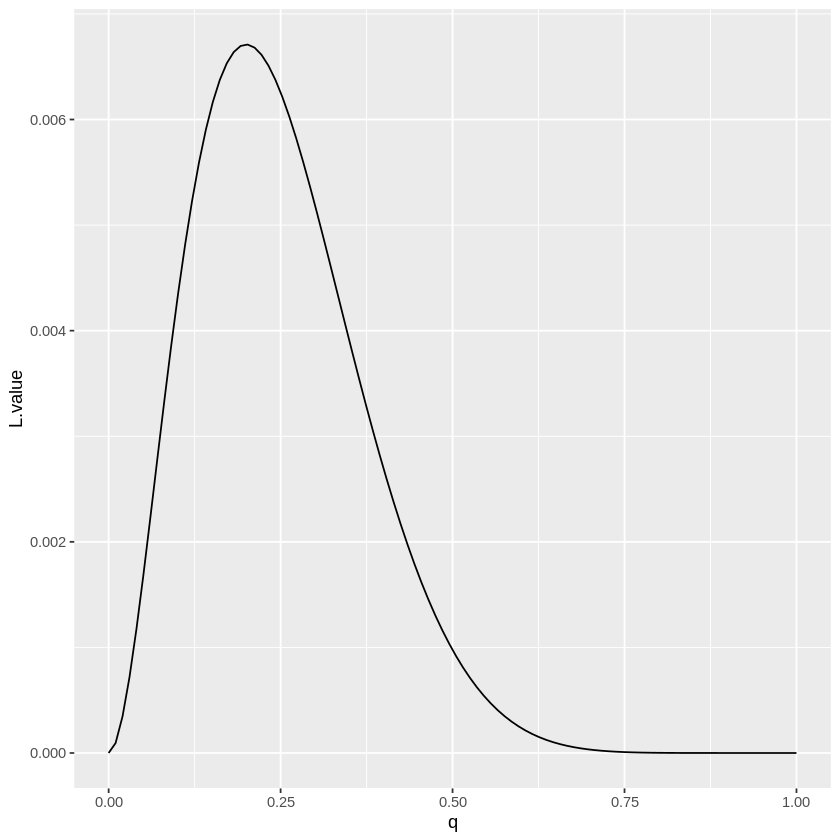

In [17]:
data.frame(q, L.value) %>% ggplot() + geom_line(aes(q, L.value))

### 2.2.2 確率変数としての最尤推定量

ベルヌーイ分布の最尤推定量は$\hat q = \overline Y$である．先の例について，最尤推定値を求めてみよう．

In [18]:
y <- rec.data$action
hat.q <- mean(y)
hat.q

[1] 0.2

## 2.3 最尤法のもとでの予測分布

### 人気のないブログ

ブログへのアクセス人数を３０日間集計した結果，以下を得た．

In [19]:
xn <- c(3, 1, 3, 1, 2, 4, 4, 5, 5, 3, 1, 8, 0, 1, 0, 2, 2, 2, 5, 3, 2, 1, 3, 1, 2, 2, 5, 2, 3 ,2)

#### p.33 の図2.2 の```histogram``` を作成してみる．

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


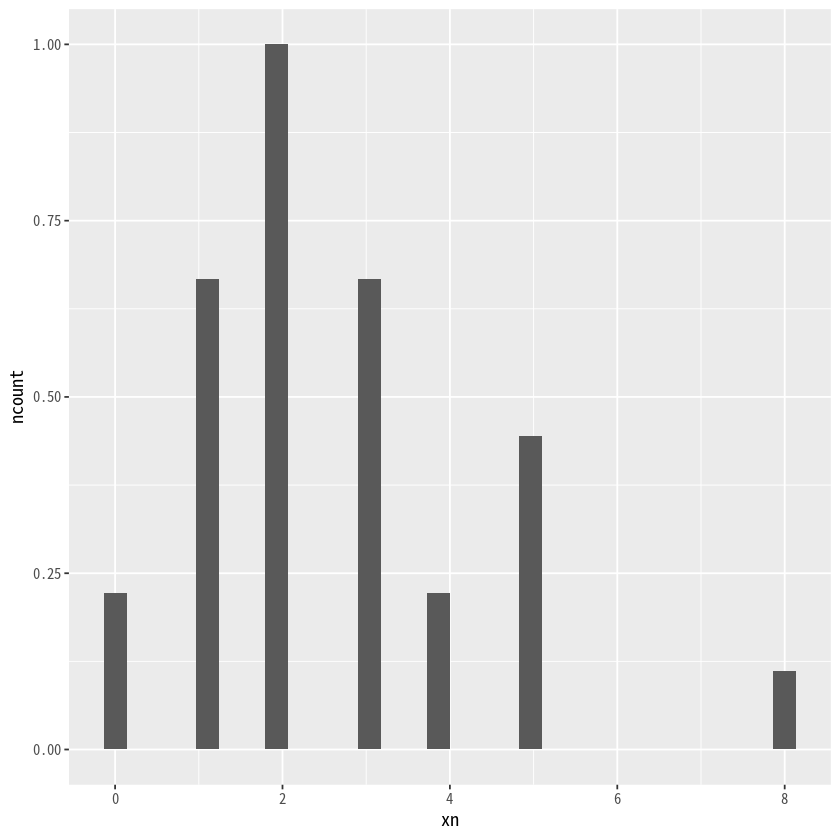

In [38]:
data.frame(xn) %>% ggplot() + geom_histogram(aes(xn))

幅を調整．

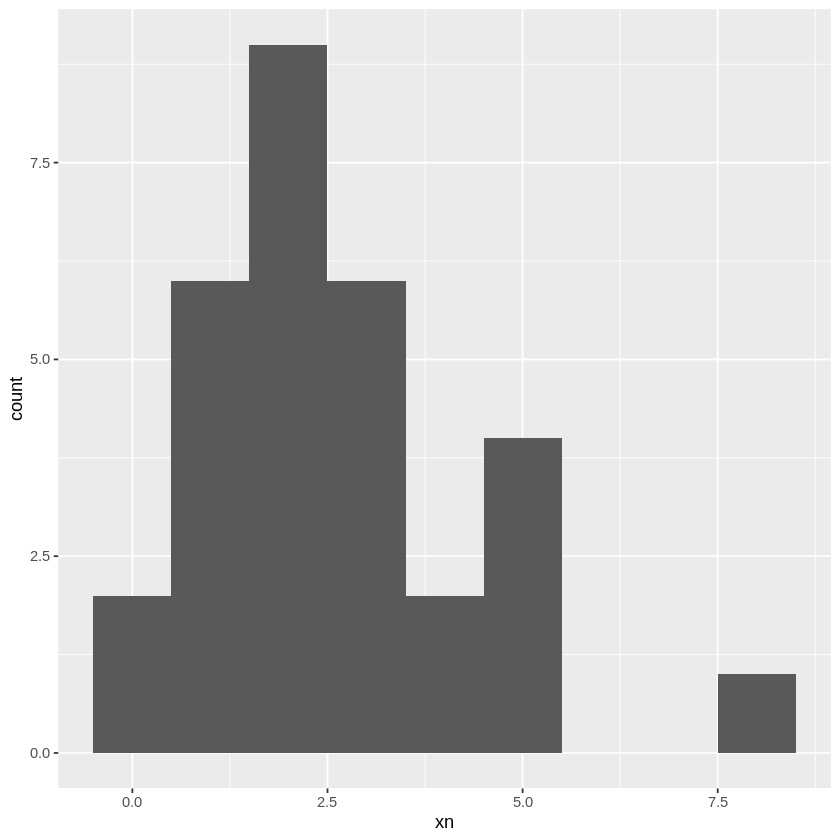

In [21]:
data.frame(xn) %>% ggplot() + geom_histogram(aes(xn), binwidth = 1)

```bin```の枠色を調整

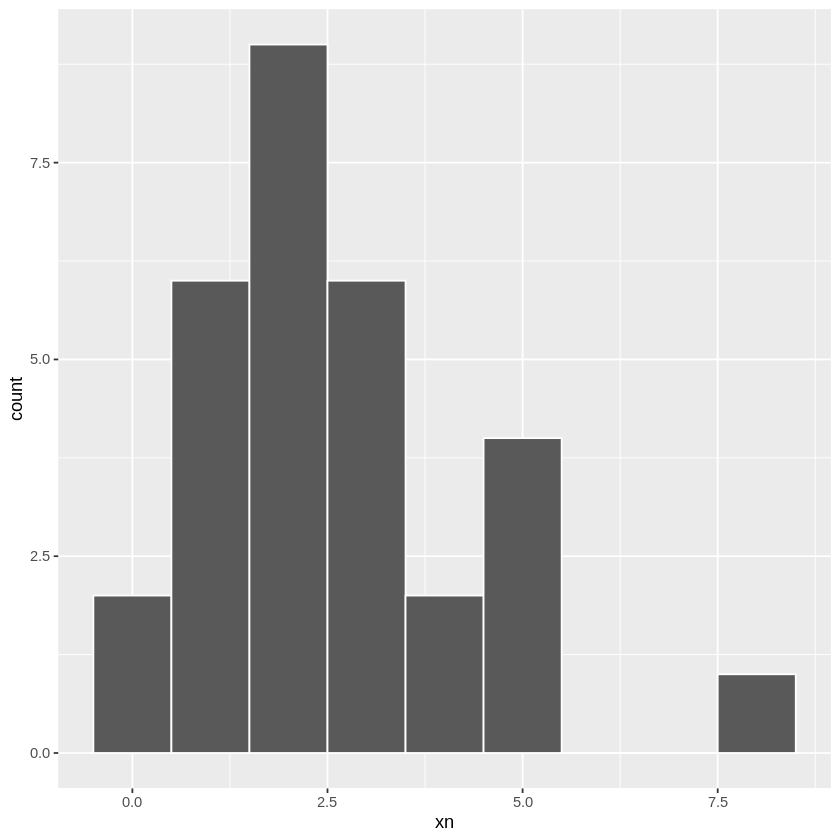

In [22]:
data.frame(xn) %>% ggplot() + geom_histogram(aes(xn), binwidth = 1, col="white")

横軸の目盛がきになるので，整数値を取るように修正．

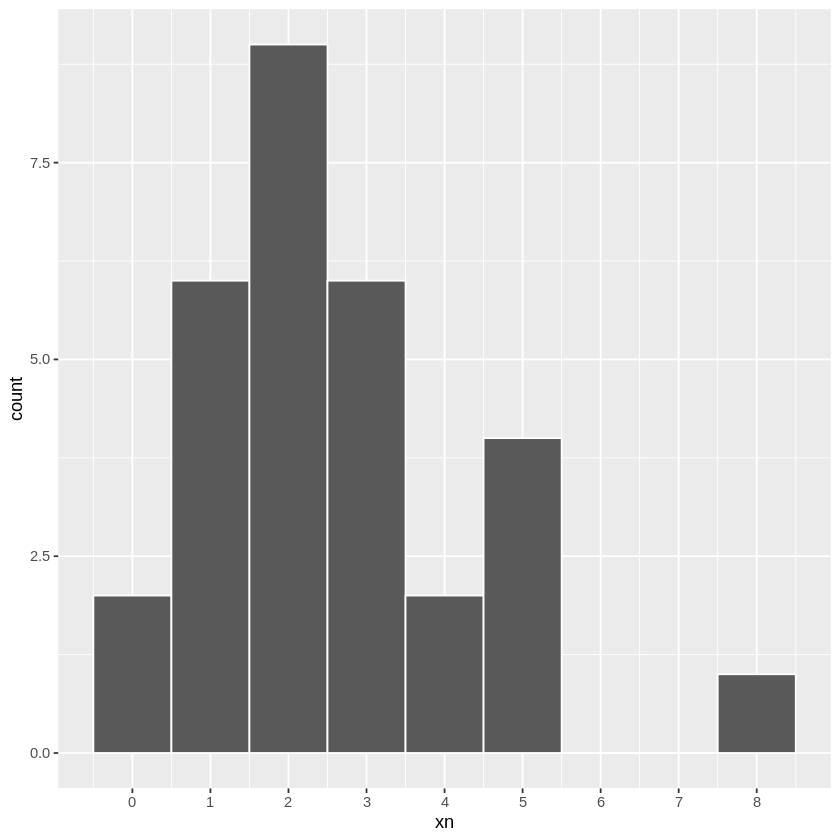

In [23]:
data.frame(xn) %>% ggplot() + geom_histogram(aes(xn), binwidth = 1, col="white") + 
  scale_x_continuous(breaks = 0:8)

縦軸が度数になっているので，相対度数に書き換える．

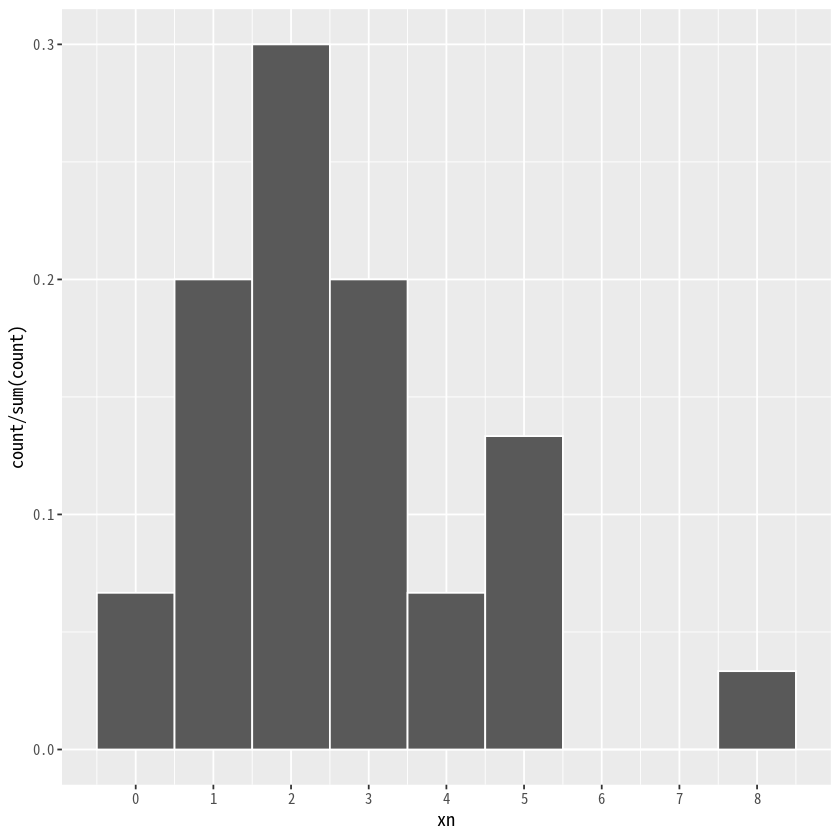

In [39]:
data.frame(xn) %>% ggplot() + geom_histogram(aes(xn, ..count../sum(..count..)), binwidth = 1, col="white") + 
  scale_x_continuous(breaks = 0:8)

最後に，タイトル「ブログのアクセス数」，横軸「アクセス人数」，縦軸「相対度数」を入れる．

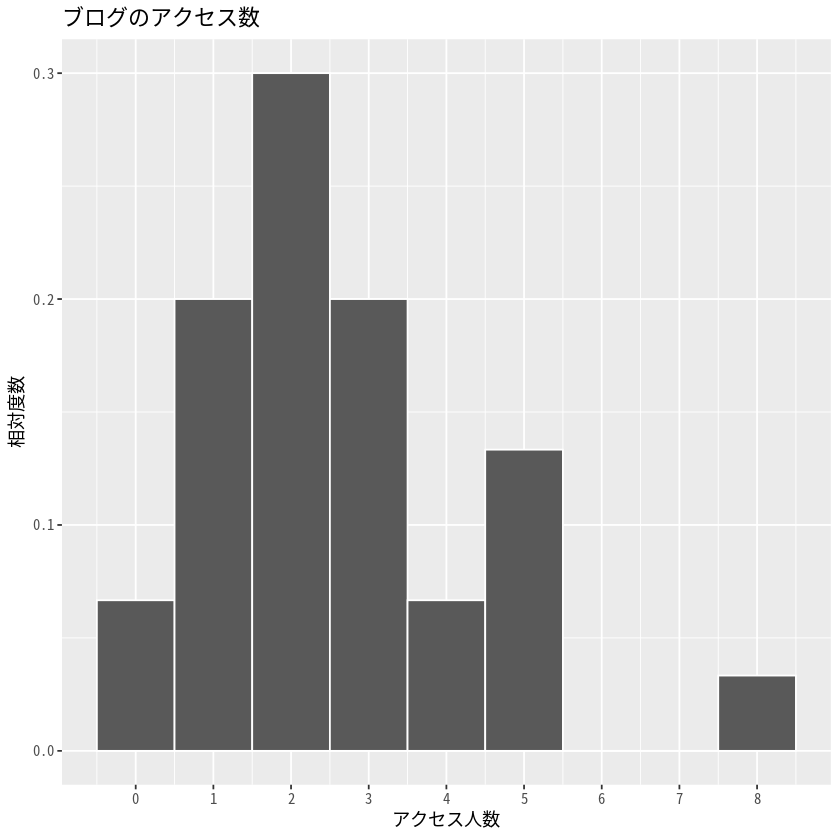

In [41]:
data.frame(xn) %>% ggplot() + 
  geom_histogram(aes(xn, ..count../sum(..count..)), binwidth = 1, col="white") + 
  scale_x_continuous(breaks = 0:8)+
  ggtitle("ブログのアクセス数") + xlab("アクセス人数") + ylab("相対度数")

#### 予測分布を重ねる

このデータにパラメータ$\lambda$のポアソン分布を仮定して，最尤推定値$\hat\lambda$を求める．$\hat\lambda=\overline x_n$である．

In [43]:
hat.lambda = mean(xn)
hat.lambda

[1] 2.6

最尤法における予測分布は，最尤推定値を確率関数にプラグインしたものである．つまり，${\rm Pisson}(x| \hat \lambda) = \frac{\hat\lambda^x}{x!}e^{-\hat\lambda}$．ただし，x!の計算には，$\Gamma(x+1)=x!$を利用する．

In [47]:
p <- function(x, lambda){
  lambda^x / gamma(x+1) * exp(-lambda)
}
predict.func <- function(x){
  p(x, hat.lambda)
}
pred <- predict.func(0:8)
pred

[1] 0.074273578 0.193111303 0.251044694 0.217572068 0.141421844 0.073539359
[7] 0.031867056 0.011836335 0.003846809

この予測分布を，ヒストグラムに重ねる．

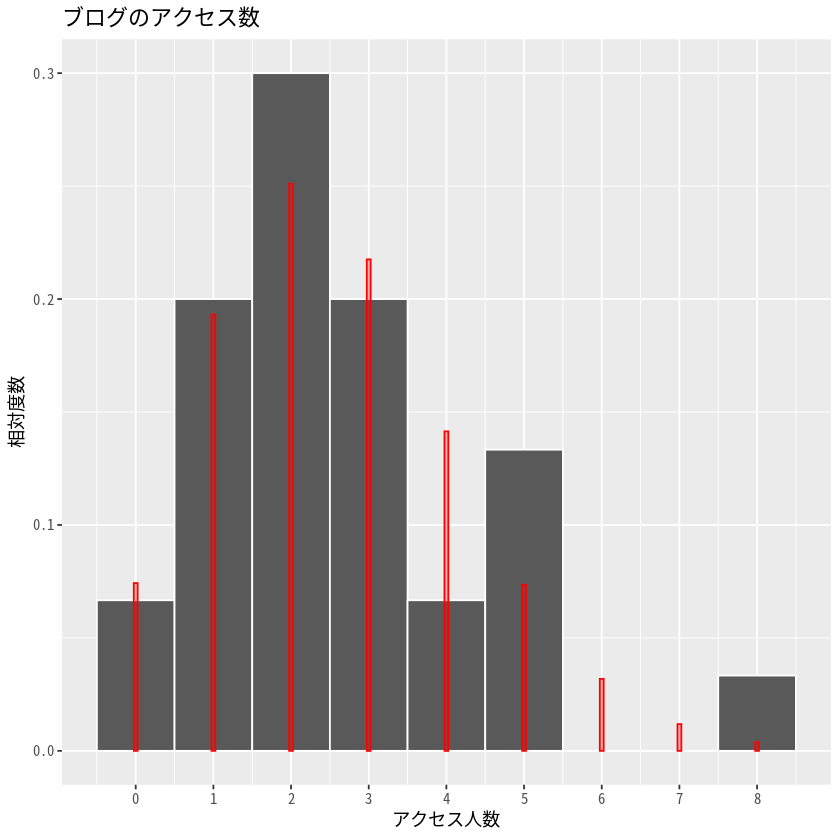

In [56]:
data.frame(xn) %>% ggplot() + 
  geom_histogram(aes(xn, ..count../sum(..count..)), binwidth = 1, col="white") + 
  scale_x_continuous(breaks = 0:8)+
  ggtitle("ブログのアクセス数") + xlab("アクセス人数") + ylab("相対度数") +
  geom_bar(data=data.frame(i=0:8, pred), aes(i, weight=pred), col="red", fill="red", width=0.05, alpha=.3)